In [92]:
import pandas as pd
import matplotlib.pyplot as plt


In [267]:
fg_data_df = pd.read_excel('fg_data.xlsx', engine='openpyxl')
punt_data_df = pd.read_excel('punt_net_data.xlsx', engine='openpyxl')

In [94]:
fg_data_df.head()


,Regular/Playoffs,Stadium,Indoor/Outdoor,Home,TEAM,Year,Game,Kicker,Distance,Made,Miss,Single,H/A,Play by play text
0,R,tor,O,TOR,HAM,2016,10,Maher,39,Y,NaN,NaN,A,"(04:41) B. MAHER Field Goal (39 yds), Good"
1,R,tor,O,TOR,HAM,2016,10,Maher,38,Y,NaN,NaN,A,"(12:10) B. MAHER Field Goal (38 yds), Good"
2,R,tor,O,TOR,HAM,2016,10,Maher,50,Y,NaN,NaN,A,"(08:58) B. MAHER Field Goal (50 yds), Good"
3,R,tor,O,TOR,TOR,2016,10,Hajrullahu,40,Y,NaN,NaN,H,"(03:37) L. HAJRULLAHU Field Goal (40 yds), Good"
4,R,tor,O,TOR,TOR,2016,10,Hajrullahu,51,Y,NaN,NaN,H,"(00:04) L. HAJRULLAHU Field Goal (51 yds), Good"


In [268]:
punt_data_df.head()

,I/O,TEAM,HOME,YEAR,PUNTER,LOS,POST-PUNT,SINGLE,NET,EV OF PUNT,PLAY-BY-PLAY
0,O,TOR,TOR,2016,L.Hajrullahu,37,41,NaN,32,-1.759234,NaN
1,O,TOR,TOR,2016,L.Hajrullahu,48,19,NaN,43,-1.548484,NaN
2,O,TOR,TOR,2016,L.Hajrullahu,45,33,NaN,32,-1.543891,NaN
3,O,TOR,TOR,2016,L.Hajrullahu,64,6,NaN,40,-1.588132,NaN
4,O,TOR,TOR,2016,L.Hajrullahu,27,53,NaN,30,-2.329292,NaN


In [279]:
def clean_df_fg(df):
   # drop columns not interested in
   df = df.drop(['Regular/Playoffs', 'Game', 'Play by play text', 'Single'], axis=1)
   df = df.rename(columns={'Stadium':'LOCATION', 'Year':'YEAR', 'Distance':'DISTANCE', 'Kicker':'NAME', 'Indoor/Outdoor': 'INOUT', 'Home':'HOME', 'Made':'MADE', 'Miss':'MISS', 'H/A':'HOMEAWAY'})
   # fill in nan values with 0 for Made col
   df['MADE'] = df['MADE'].fillna(0)
   df['MISS'] = df['MISS'].fillna(0)
   # replace Y and y in Made col with 1 to make it a binary column
   df = df.replace({'MADE': {'Y': 1, 'y': 1}})
   return df

def clean_df_punt(df):
   df = df.drop(['PLAY-BY-PLAY'], axis=1)
   df = df.rename(columns={'HOME':'LOCATION'})
   df['SINGLE'] = df['SINGLE'].fillna(0)
   return df

fg_data_df_clean = clean_df_fg(fg_data_df)
punt_data_df_clean = clean_df_punt(punt_data_df)
punt_data_df_clean.head(), fg_data_df_clean.head()

   

(  I/O TEAM LOCATION  YEAR        PUNTER  LOS  POST-PUNT  SINGLE  NET  \
 0   O  TOR      TOR  2016  L.Hajrullahu   37         41     0.0   32   
 1   O  TOR      TOR  2016  L.Hajrullahu   48         19     0.0   43   
 2   O  TOR      TOR  2016  L.Hajrullahu   45         33     0.0   32   
 3   O  TOR      TOR  2016  L.Hajrullahu   64          6     0.0   40   
 4   O  TOR      TOR  2016  L.Hajrullahu   27         53     0.0   30   
 
    EV OF PUNT  
 0   -1.759234  
 1   -1.548484  
 2   -1.543891  
 3   -1.588132  
 4   -2.329292  ,
   LOCATION INOUT HOME TEAM  YEAR        NAME  DISTANCE  MADE MISS HOMEAWAY
 0      tor     O  TOR  HAM  2016       Maher        39     1    0        A
 1      tor     O  TOR  HAM  2016       Maher        38     1    0        A
 2      tor     O  TOR  HAM  2016       Maher        50     1    0        A
 3      tor     O  TOR  TOR  2016  Hajrullahu        40     1    0        H
 4      tor     O  TOR  TOR  2016  Hajrullahu        51     1    0        H)

## Get Accuuracies for Each range of Fg's by 5 yards
### Plot misses by distance

In [97]:
def get_accuracy(df):
   made_fgs = (df['MADE'] == 1).sum()
   missed_fgs = (df['MADE'] == 0).sum()
   accuracy = (made_fgs / (made_fgs + missed_fgs)).round(3)*100
   return accuracy

def get_distance_accuracies(df):
   df015_acc = get_accuracy(df.loc[(df['DISTANCE'] >= 0) & (df['DISTANCE'] <= 15)]) 
   df1629_acc = get_accuracy(df.loc[(df['DISTANCE'] >= 16) & (df['DISTANCE'] <= 29)])
   df3035_acc = get_accuracy(df.loc[(df['DISTANCE'] >= 30) & (df['DISTANCE'] <= 35)])
   df3640_acc = get_accuracy(df.loc[(df['DISTANCE'] >= 36) & (df['DISTANCE'] <= 40)])
   df4145_acc = get_accuracy(df.loc[(df['DISTANCE'] >= 41) & (df['DISTANCE'] <= 45)])
   df4650_acc = get_accuracy(df.loc[(df['DISTANCE'] >= 46) & (df['DISTANCE'] <= 50)])
   df51_acc = get_accuracy(df.loc[(df['DISTANCE'] >= 51)])
   accuracies = [df015_acc,df1629_acc, df3035_acc,df3640_acc, df4145_acc, df4650_acc, df51_acc]
   return(accuracies)

fg_dist_accs = get_distance_accuracies(fg_data_df_clean)


# get_accuracy(fg_data_df_clean)


Text(0, 0.5, 'Accuracy (%)')

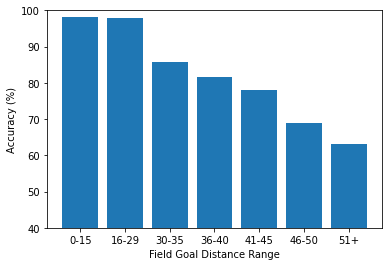

In [98]:
plt.bar(['0-15', '16-29', '30-35', '36-40', '41-45', '46-50','51+'],fg_dist_accs)
plt.ylim(40,100)
plt.xlabel('Field Goal Distance Range')
plt.ylabel('Accuracy (%)')


### See that Accuracies are near 100 up until the 30 yard range when there is a large drop off to about 85%.  
### So for our FG data going forward we will use only field geals kicked from 30 yards and beyond to eliminate kicks that have little chance of missing.
### This is so that if one stadium happens to have a higher % of shorter distance fgs this will not skew the data to it being a more accurate stadium.

In [99]:
def remove_short_fgs(dist, df):
   new_df = df.loc[df['DISTANCE'] > dist]
   return new_df

long_fg_data = remove_short_fgs(29, fg_data_df_clean)

print('ALL FG MAKES AND MISSES DATA COUNT: \n', fg_data_df_clean['MADE'].value_counts())
print('LONG FG MAKES AND MISSES DATA COUNT: \n', long_fg_data['MADE'].value_counts())

ALL FG MAKES AND MISSES DATA COUNT: 
 1    1594
0     286
Name: MADE, dtype: int64
LONG FG MAKES AND MISSES DATA COUNT: 
 1    939
0    272
Name: MADE, dtype: int64


## By eliminating short fieldgoals with a high rate of accuracy, those field goals from 29 yards and in, we have removed 655 made fieldgoals but only 14 misses which is an accuracy rate of 97.9%. 
## Field goal accuracy from 30 and beyond is 78%. 



In [100]:
## Not sure if this adds anything - probably delete

#fg_data_df_clean.hist(column='DISTANCE')
#long_fg_data.hist(column='DISTANCE')


# Get accuracy for each stadium
# old code seperated it into home and away data to start - this is included in the data itself so could change how do it or just do same way to save time

In [278]:
def get_location_fg_accuracies(df):
   #  total_attempts = df['FG_ATTEMPTS'].groupby(df['LOCATION']).sum()
   total_makes = (df['MADE'] == 1).groupby(df['LOCATION']).sum()
   total_misses = (df['MADE'] == 0).groupby(df['LOCATION']).sum()
   accuracies = (total_makes / (total_misses + total_makes) *100).round(1)
   new_df = pd.DataFrame(accuracies)
   return new_df
    
def get_location_net_punts(df):
   total_net = df['NET'].groupby(df['LOCATION']).sum()
   total_punts = (df['LOCATION']).value_counts()
   net_ave = (total_net / total_punts).round(2)
   new_df = pd.DataFrame(net_ave, columns=['NET_PUNT_AVE'])
   return new_df


# home_fg_accuracies = get_location_fg_accuracies(df_home_fg_clean)
# away_fg_accuracies = get_location_fg_accuracies(df_away_fg_clean)
long_fg_acc_df = get_location_fg_accuracies(long_fg_data)
all_fg_acc_df = get_location_fg_accuracies(fg_data_df_clean)

get_location_net_punts(punt_data_df_clean)



,NET_PUNT_AVE
BC,35.01
CGY,34.94
EDM,35.41
HAM,34.36
MTL,34.18
OTT,35.83
SSK,33.89
TOR,34.20
WPG,35.60


In [162]:

away_long_fg_data = long_fg_data[long_fg_data.HOMEAWAY.eq('A')]
home_long_fg_data = long_fg_data[long_fg_data.HOMEAWAY.eq('H')]

long_fg_acc_away_df = get_location_fg_accuracies(away_long_fg_data)
long_fg_acc_home_df = get_location_fg_accuracies(home_long_fg_data)



In [189]:
# plot these all together, har chart
df_fg_acc = [all_fg_acc_df, long_fg_acc_df, long_fg_acc_away_df, long_fg_acc_home_df]
df_fg_acc = pd.concat(df_fg_acc, axis=1)
# df_fg_acc = df_fg_acc.drop(['LOCATION'], axis =1)
df_fg_acc.columns = ['ALL_FGS', 'LONG_FGS', 'LONG_AWAY_FGS', 'LONG_HOME_FGS']
df_fg_acc['PERCENT_CHANGE_REMOVING_SHORT'] = df_fg_acc['ALL_FGS'] - df_fg_acc['LONG_FGS']
df_fg_acc['DIFF_REMOVING_HOME_KICKERS'] = df_fg_acc['LONG_FGS'] - df_fg_acc['LONG_AWAY_FGS']
df_fg_acc
# df_fg_acc.plot.bar(subplots=True, layout=(4,2), figsize=(16,8), sharey=True)



,ALL_FGS,LONG_FGS,LONG_AWAY_FGS,LONG_HOME_FGS,PERCENT_CHANGE_REMOVING_SHORT,DIFF_REMOVING_HOME_KICKERS
LOCATION,,,,,,
bc,85.0,77.7,75.3,80.3,7.3,2.4
cgy,89.3,82.8,85.7,80.3,6.5,-2.9
edm,85.8,77.7,73.9,82.7,8.1,3.8
ham,82.9,77.9,76.0,80.0,5.0,1.9
mtl,83.0,73.6,76.8,68.1,9.4,-3.2
ott,83.4,74.7,69.9,79.5,8.7,4.8
ssk,85.5,79.0,83.1,75.3,6.5,-4.1
tor,80.9,73.0,74.2,71.7,7.9,-1.2
wpg,87.4,80.8,82.8,79.1,6.6,-2.0


# plot difference in accuracy after removing short fgs, showing how a higher percentage of short fgs could skew the data for one location over others
### orange line shows average, larger the bar, the larger the decrease in accuarcy meaning the more fgs that were in the short range at that location
### find that Montreal and Ottawa had the biggest drops in accuracy, so meaning they had a more signifincant amount of attempts from the high accuracy range
### whereas hamilton had the lowest change in %, meaning a higher proportion of fgs attempted in Hamilton were from 30 yards and beyond
### Edmonton, Montreal, Ottawa, Toronto were above the average drop in accuracy, so higher proportion of shorter fgs
### Calgary, Hamilton, Sask, Winnipeg all had below average drops in accuarcy so lower proportion of shorter high accuracy fgs
### BC was right on the average


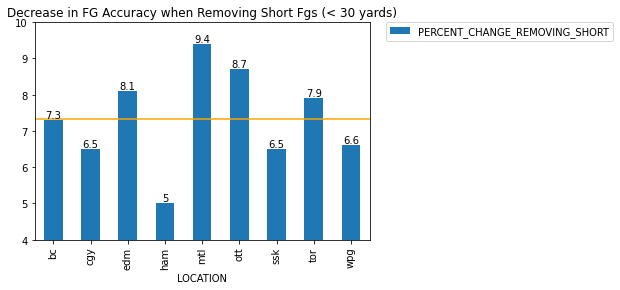

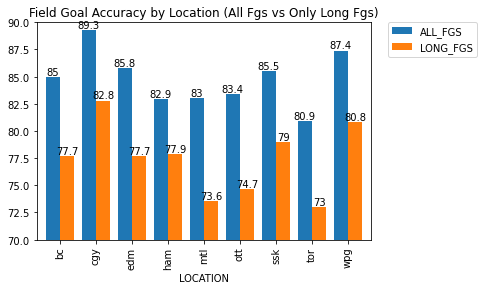

In [197]:
ax0 = df_fg_acc.plot.bar(title='Decrease in FG Accuracy when Removing Short Fgs (< 30 yards)', y=['PERCENT_CHANGE_REMOVING_SHORT'])
ax0.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax0.set_ylim(4,10)
ax0.axhline(df_fg_acc['PERCENT_CHANGE_REMOVING_SHORT'].mean(), color='orange')
for container in ax0.containers:
   ax0.bar_label(container)


ax1 = df_fg_acc.plot.bar(title='Field Goal Accuracy by Location (All Fgs vs Only Long Fgs)', y=['ALL_FGS', 'LONG_FGS'], width=0.8)
ax1.set_ylim(70, 90)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
for container in ax1.containers:
   ax1.bar_label(container)


# Plot Home Vs Away FG Accuracies
## Home kicker has about half the data at each location for each year, so significantly skew the data, maybe could could do something to reduce their weighting? otherwise seperate
## Find that some kickers improve overall accuracy and some worsen accuracy
## BC, Edmonton, Hamilton, Ottawa all improved the overall accuarcy of their respective stadiums
## Calgary, Montreal, Sask, Toronto, and Winnipeg actually worsened overall accuracy 
## Biggest change is in Montreal, most significant difference between Home performance and Away

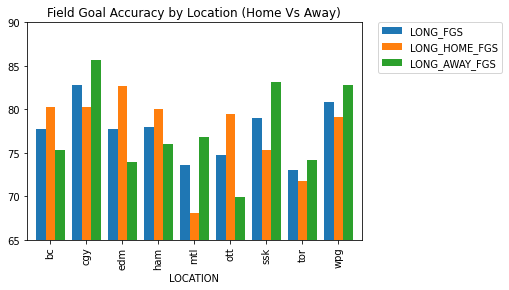

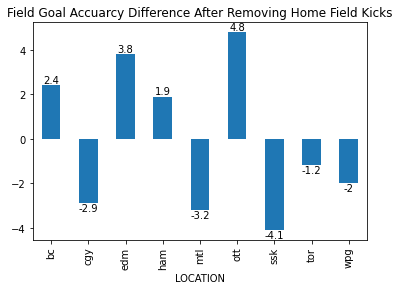

In [195]:

ax2 = df_fg_acc.plot.bar(title='Field Goal Accuracy by Location (Home Vs Away)', y=['LONG_FGS', 'LONG_HOME_FGS', 'LONG_AWAY_FGS'], width=0.8)
ax2.set_ylim(65, 90)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

ax3 = df_fg_acc.plot.bar(title='Field Goal Accuarcy Difference After Removing Home Field Kicks', y=['DIFF_REMOVING_HOME_KICKERS'], legend=False)
# ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

for container in ax3.containers:
   ax3.bar_label(container)



## Can see that BC, Edmonton, Hamilton, Ottawa kickers all increased the overall accuarcy at their home stadiums
## Calgary, Montreal, Sask, Toronto, Winnipeg's home team kickers actually reduced the accuarcy at their home fields. 
## Seperate the home field kickers as they have a much heavier weighting and can skew the results to their own

# Kickoffs and Elevation

In [201]:
import requests
import json
import numpy as np
from bs4 import BeautifulSoup


## Download Kickoff Data

** implement error handling for 404 and webscraping

In [215]:
team_codes = ['bc', 'edm', 'cgy', 'ssk', 'wpg', 'ham', 'tor', 'ott', 'mtl']

def get_site_json(url):
   data_page = requests.get(url)
   soup = BeautifulSoup(data_page.content, 'html.parser')
   site_json = json.loads(soup.text)
   return site_json


def get_kickoff_data(team_codes, include_home):
   base_url = 'https://www.cfl.ca/wp-content/themes/cfl.ca/inc/admin-ajax.php?action=get_league_stats&stat_category=punting&filter[season][ge]=2016&filter[punts][ge]=1&filter[location][eq]='
   json_data = []
   for team in team_codes:
      if include_home: 
         url = base_url + team + '&group_by=player'
      else: 
         url = base_url + team + '&filter[opponent_team_abbreviation][eq]=' + team + '&group_by=player'
      site_json = get_site_json(url)
      json_data.append(site_json)
   return json_data


In [217]:
# download kickoff data
kickoff_punt_data = get_kickoff_data(team_codes, True)
kickoff_punt_data_away = get_kickoff_data(team_codes, False)

## !! Save data to computer !!

In [317]:
# save to file
def save_json_to_file(data, name):
   with open(name, 'w', encoding='utf-8') as f:
      json.dump(data, f, ensure_ascii=False, indent=3)

save_json_to_file(kickoff_punt_data, 'kickoff_punt_data.json')
save_json_to_file(kickoff_punt_data_away, 'kickoff_punt_data_away.json')

In [227]:
# create DF from json
def getDFFromJson(data):
   df = pd.DataFrame(data['data'])
   return df

# Column headers for punt df and field goal df
punt_ko_cols = ['YEAR', 'NAME', 'LOCATION', 'URL', 'TEAM', 'GAMES_PLAYED', 'NUMBER_OF_PUNTS', 'PUNT_YDS', 'PUNT_AVG', 'PUNT_LONG', 'PUNT_SINGLES', 'NUMBER_OF_KICKOFFS', 'KO_YDS', 'KO_AVG', 'KO_LG', 'KO_S']

def createDFwLocationFromFile(file_name, team_codes, column_names):
    #check if length of data = length of team_codes
    with open(file_name) as f:
        data = json.load(f)
    if(len(data) == len(team_codes)):
        print('length equal')
        # empty array to put each stadium dfs in
        dn = []
        for i, team in enumerate(team_codes):
            #create df from data[i]
            df = getDFFromJson(data[i])
            #add location of game to df
            df.insert(2, 'LOCATION', team)
            #add df to df list
            dn.append(df)
        # create new df with all location dfs combined
        dn = pd.concat(dn, axis=0, )
        # add column names to df
        
        dn.columns = column_names
        return dn
    else:
        print('not equal')

df_punt_ko = createDFwLocationFromFile('kickoff_punt_data.json', team_codes, punt_ko_cols)
df_punt_ko_away = createDFwLocationFromFile('kickoff_punt_data_away.json', team_codes, punt_ko_cols)


length equal
length equal


In [229]:
def clean_df_ko(df):
   #filter out any rows with punts < 2
   #remove Kickoff columns and other columns not of interest
   df = df[df.NUMBER_OF_KICKOFFS.gt(1)].drop(['URL', 'TEAM', 'GAMES_PLAYED', 'NUMBER_OF_PUNTS', 'PUNT_YDS', 'PUNT_AVG', 'PUNT_LONG', 'PUNT_SINGLES', 'KO_LG', 'KO_S'], axis=1)

   #sort values
   df = df.sort_values(by=['LOCATION','NAME', 'YEAR'])
   df['LOCATION'] = df['LOCATION'].str.upper()

   #convert KO_AVG type from object to float
   df['KO_AVG'] = df['KO_AVG'].astype(float, errors = 'raise')
   return df
   
df_ko = clean_df_ko(df_punt_ko)
df_ko_away = clean_df_ko(df_punt_ko_away)


In [245]:
def get_location_ko_averages(df):
    total_kos = df['NUMBER_OF_KICKOFFS'].groupby(df['LOCATION']).sum()
    total_ko_yards = df['KO_YDS'].groupby(df['LOCATION']).sum()
    averages =  (total_ko_yards / total_kos).round(1)
    df = pd.DataFrame(averages, columns=['KO_AVG'])
   #  df['LOCATION'] = df.index
    return df

ko_loc_avg_df = get_location_ko_averages(df_ko)
ko_loc_avg_away_df = get_location_ko_averages(df_ko_away)

### Using linear regression find that elevation does have an effect on kickoff distance.  
Elevations were taken from https://en-ca.topographic-map.com/ and are in meters above sea level.  
Red line shows the regression line when looking at visiting kickers only, again to reduce the weighting the home field 

<AxesSubplot:xlabel='ELEVATION', ylabel='KO_AVG'>

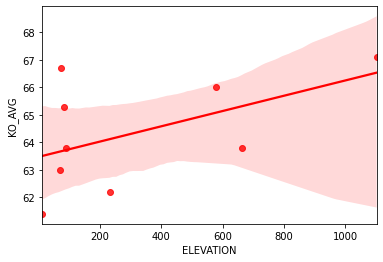

In [320]:
import seaborn as sns

elevations = [11, 1102, 662, 89, 70, 72, 580, 82, 232]
ko_loc_avg_df['ELEVATION'] = elevations
ko_loc_avg_away_df['ELEVATION'] = elevations
# ax1 = ko_loc_avg_df.plot.scatter(x='KO_AVG', y='ELEVATION', title='Kickoff Vs Elevation All Kickoffs')
# ax2 = ko_loc_avg_away_df.plot.scatter(x='KO_AVG', y='ELEVATION', title='Kickoff Vs Elevation Away Kickoffs')
sns.regplot(y=ko_loc_avg_away_df['KO_AVG'], x=ko_loc_avg_away_df['ELEVATION'], color='red')
# sns.regplot(y=ko_loc_avg_df['KO_AVG'], x=ko_loc_avg_df['ELEVATION'])

In [235]:
import numpy as np
from sklearn.linear_model import LinearRegression


In [262]:
x = (ko_loc_avg_away_df['ELEVATION'].values).reshape(-1,1)
y = ko_loc_avg_away_df['KO_AVG'].values.reshape(-1,1)
model = LinearRegression().fit(x,y)
y_pred = model.predict([[0]])
print(' R2: ', model.score(x,y), '\n Slope: ', model.coef_[0][0], '\n Intercept: ', model.intercept_)


 R2:  0.2693006958588402 
 Slope:  0.002777313157961299 
 Intercept:  [63.47175465]


## Distance = 63.5 + 0.00277*Elevation(m)
## Kicking at 1000m elevation adds 2.77 yards to a kickoff
## R2 is 27%, so model explains 27% of variation in Kickoff distance

# Jetlag West Travel to East
## Check how BC kickers did in Eastern provinces compared to alberta
## Continue use of only longer FGs (30+ yards)
### jetlag at least 2 timezones of travel 

### west to east travel (hardest in theory)

### Vancouver to WPG and beyond + AB to ONT

### east to west travel (easier)

### ONT to AB and BC + WPG to BC
### jetlag source https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3435929/






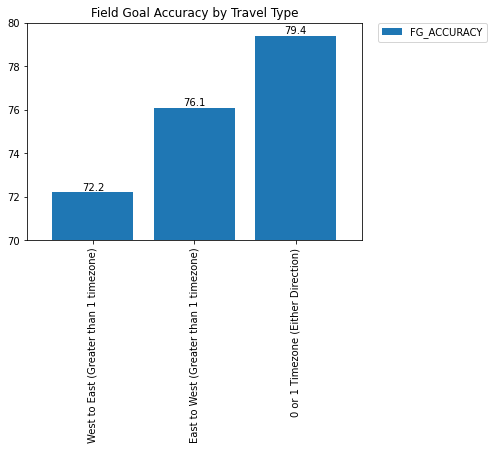

In [322]:
def get_fgs_of_team_in_loc(df, kickers_teams, away_stadiums):
   home_kicker_df = df[df.TEAM.isin(kickers_teams)]
   home_kicker_df = home_kicker_df[home_kicker_df.HOME.isin(away_stadiums)]
   return home_kicker_df
   

# WEST TO EAST TRAVEL 2+ TIMEZONES TRAVELED
bc_ab_to_ont_travel = get_fgs_of_team_in_loc(away_long_fg_data, ['BC','EDM','CGY'], ['TOR','OTT','MTL','HAM'])
bc_to_wpg_travel = get_fgs_of_team_in_loc(away_long_fg_data, ['BC'], ['WPG'])
# combine
west_to_east_travel = pd.concat([bc_ab_to_ont_travel, bc_to_wpg_travel])

# EAST TO WEST TRAVEL 2+ TIMEZONES TRAVELED
ont_to_ab_bc_travel = get_fgs_of_team_in_loc(away_long_fg_data, ['TOR','OTT', 'MTL', 'HAM'], ['BC','EDM','CGY'])
wpg_to_bc_travel = get_fgs_of_team_in_loc(away_long_fg_data, ['WPG'], ['BC'])
# combine
east_to_west_travel = pd.concat([ont_to_ab_bc_travel, wpg_to_bc_travel])

# LOCAL TRAVEL - 0-1 TIMEZONES TRAVELED
bc_ab_travel = get_fgs_of_team_in_loc(away_long_fg_data, ['BC','EDM','CGY'], ['BC','EDM','CGY'])
ab_sask_wpg_travel = get_fgs_of_team_in_loc(away_long_fg_data, ['EDM','CGY','SSK','WPG'], ['EDM','CGY','SSK','WPG'])
wpg_ont_travel = get_fgs_of_team_in_loc(away_long_fg_data, ['TOR','OTT','MTL','HAM','WPG'], ['TOR','OTT','MTL','HAM','WPG'])
# combine
one_timezone_travel = pd.concat([bc_ab_travel, ab_sask_wpg_travel, wpg_ont_travel])


fg_acc_west_to_east_travel = get_accuracy(west_to_east_travel) 
fg_acc_east_to_west_travel = get_accuracy(east_to_west_travel) 
fg_acc_one_timezone_travel = get_accuracy(one_timezone_travel)



jetlag_index = ['West to East (Greater than 1 timezone)', 'East to West (Greater than 1 timezone)', '0 or 1 Timezone (Either Direction)']
jetlag_df = pd.DataFrame(data={'FG_ACCURACY': [fg_acc_west_to_east_travel, fg_acc_east_to_west_travel, fg_acc_one_timezone_travel]}, index=jetlag_index)

ax4 = jetlag_df.plot.bar(title='Field Goal Accuracy by Travel Type', width=0.8)
ax4.set_ylim(70, 80)
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
for container in ax4.containers:
   ax4.bar_label(container)



## As expected in results, find that local travel (0-1 timezones travelled) had the highest fg accuracy
## this currently includes home field kickers? does this matter?
## Find that East to west travel not that large of a dropoff in accuracy - drops 2.6% from local travel
## Find that West to East travel has the lowest accuarcy - 72.2 % which is 6.5% less than local travel
